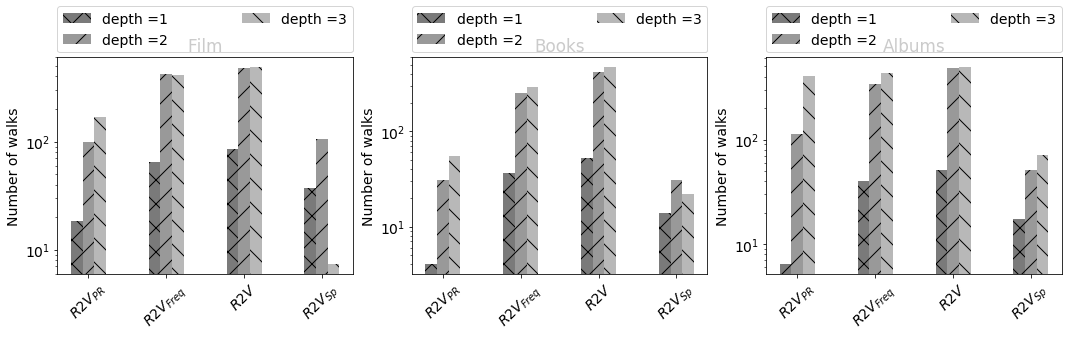

In [20]:
import datetime
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dirname = "./ResultsData/Fig4/"
labels = ["NRSE","NRSE'","UE","UEP","NRST","NRST'","$R2V_{PR}$","$R2V_{Freq}$","$R2V$","$R2V_{Sp}$","$NRSE_{Sp}$","NRSE'-Sp","$UE_{Sp}$","$UEP_{Sp}$","$NRST_{Sp}$","NRST'-Sp","$UET_{Sp}$","$UETP_{Sp}$"]
styles = ['b--', 'r--', 'g--', 'y--','c--','m--','k--','b-', 'r-', 'g-', 'y-','c-','m-','k-']
markers = ['o', '^', 'v', 's','+','x','D','o', '^', 'v', 's','+','x','D']

plotWidth = 18
plotHeight = 4
barstyles = ['g', 'r', 'c', 'y']
patterns = ('/', '\\', 'x', '//', '+','x','.', 'o', 'O', '.')
barstyles = ['0.35', '0.5', '0.65', '0.8']
patterns = ('x', '/', '\\', '-', '\\', '*', 'o', 'O', '.')

bar_width = 0.15
opacity = 0.8
depths2 = list(depths)

font = {'family' : 'sans-serif',
        'weight' : 'medium',
        'size'   : 14}
matplotlib.rc('font', **font)


filenames = ['20180528_244527_film_entities_3000_qlimit500_statistics_2.txt',
             '20180528_245632_book_entities_3000_qlimit500_statistics_2.txt',
             '20180528_184649_album_entities_3000_qlimit500_statistics_2.txt'
            ]
titles = ['Film','Books','Albums']

fig, ax = plt.subplots(nrows = 1, ncols= 3, figsize=(plotWidth,plotHeight))
          
for i, filename in enumerate(filenames):
    statisticsFile = pd.read_csv(dirname + filenames[i] ,sep='\t')
    statisticsFile = statisticsFile[statisticsFile['Case'] <= 10] 
    statisticsFile = statisticsFile.sort_values(by = ['Case','Depth'], ascending=[1, 1])
    new_index = np.arange(len(statisticsFile))
    statisticsFile = statisticsFile.set_index(new_index)
    cases = np.sort(np.unique(statisticsFile['Case'].tolist()))
    depths = np.sort(np.unique(statisticsFile['Depth'].tolist()))

    for depth in depths:
        ax1 = plt.subplot(1,3,i+1)
        plt.yscale('log')
        dataslice = statisticsFile[statisticsFile['Depth'] == depth]
        casesX = dataslice['Case'].tolist()
        labelsX = [labels[i-1] for i in casesX]
        tokensY = dataslice['AvgQResults'].tolist()
        intlabelcases = np.arange(1,len(casesX)+1)
        plt.bar(intlabelcases + (depths2.index(depth)-1)*bar_width, tokensY, bar_width,
                     alpha=opacity,
                     color=barstyles[depth-1], hatch=patterns[depth-1],
                     label="depth =" + str(depth), bottom = 0)
        ax1.set_title(titles[i])
        plt.ylabel('Number of walks')
        plt.legend(loc = 3, bbox_to_anchor=(0., 1.02, 1., .102), fontsize = 'medium',
                   ncol=2, mode="expand", borderaxespad=0.)
        plt.xticks(intlabelcases, labelsX, rotation=45)
    #plt.savefig('results/avg_num_walks_movies.eps', format='eps', dpi=600, bbox_inches='tight')
plt.show()
